In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_video(path:str) -> list:
    video_cap = cv2.VideoCapture(path)

    if not video_cap.isOpened():
        raise ValueError("Could not open video file")

    frames = list()
    while True:
        ret, frame = video_cap.read()
        if not ret:
            break 
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)
    return frames

def crop_center(frame, margin: float = 0.05) -> np.ndarray:
    height, width, _ = frame.shape 

    x_center = height  // 2
    y_center = width // 2

    x_margin = int(height * margin)
    y_margin = int(width * margin)

    cropped_frame = frame[
        x_center - x_margin: x_center + x_margin, 
        y_center - y_margin : y_center + y_margin]

    return cropped_frame

def remove_OSD(frame) -> np.ndarray:
    blur = cv2.blur(frame, (5, 5))
    return blur
    

In [3]:
video_path = 'C:\\Users\\yarem\\GitHubProjects\\OSDRemoval\\OSD-Removal\\assets\\test_video.mp4'
video = read_video(video_path)

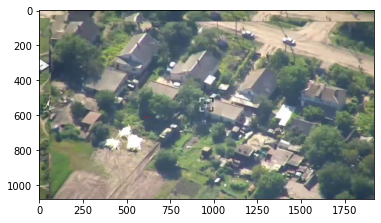

In [4]:
plt.imshow(video[0])

Text(0.5, 1.0, 'Original image')

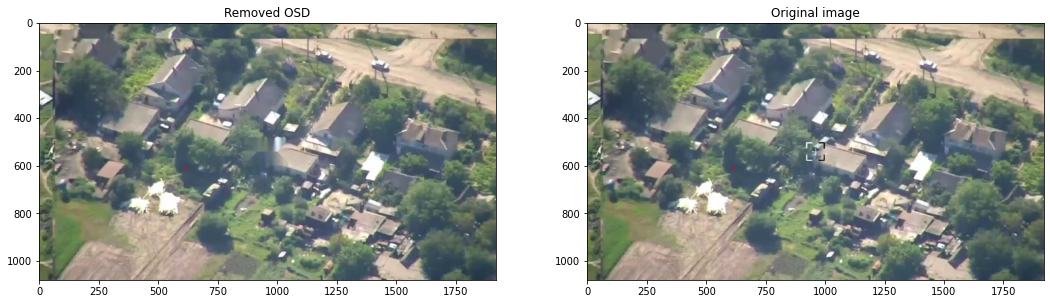

In [5]:
# Define the region containing the OSD
img = video[0]
height, width, _ = img.shape

mask = np.zeros((height, width), dtype=np.uint8)

x_center = height  // 2
y_center = width // 2

x_margin = int(height * 0.05)
y_margin = int(width * 0.05)


# Set the OSD region in the mask to be white (255)
mask[x_center - x_margin: x_center + x_margin, y_center - y_margin : y_center + y_margin] = 255

# Apply inpainting to remove OSD
inpaint_result = cv2.inpaint(img, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)



plt.figure(figsize=(18, 12))
plt.subplot(1, 2, 1)
plt.imshow(inpaint_result)
plt.title('Removed OSD')

plt.subplot(1, 2, 2)
plt.imshow(img) 
plt.title('Original image')


In [24]:
def removeOSD(image):
    cropped_img = crop_center(image)
    
    cropped_x_center = cropped_img.shape[0] // 2
    cropped_y_center = cropped_img.shape[1] // 2
    
    lb = 0.29
    ub = 0.38
    cropped_img_mask = np.zeros(cropped_img.shape)
    cropped_img_mask[int(cropped_x_center - ub * cropped_img.shape[0]) : int(cropped_x_center - lb * cropped_img.shape[0]),
                    int(cropped_y_center - ub * cropped_img.shape[0]) : int(cropped_y_center + ub * cropped_img.shape[0]), :] = [255, 255, 255]
    cropped_img_mask[int(cropped_x_center + lb * cropped_img.shape[0]) : int(cropped_x_center + ub * cropped_img.shape[0]),
                    int(cropped_y_center - ub * cropped_img.shape[0]) : int(cropped_y_center + ub * cropped_img.shape[0]), :] = [255, 255, 255]
    cropped_img_mask[int(cropped_x_center - ub * cropped_img.shape[0]) : int(cropped_x_center + ub * cropped_img.shape[0]),
                    int(cropped_y_center - ub * cropped_img.shape[0]) : int(cropped_y_center - lb * cropped_img.shape[0]), :] = [255, 255, 255]
    cropped_img_mask[int(cropped_x_center - ub * cropped_img.shape[0]) : int(cropped_x_center + ub * cropped_img.shape[0]),
                    int(cropped_y_center + lb * cropped_img.shape[0]) : int(cropped_y_center + ub * cropped_img.shape[0]), :] = [255, 255, 255]
    
    tb = 0.03
    lb = 0.16
    cropped_img_mask[int(cropped_x_center - tb * cropped_img.shape[0]) : int(cropped_x_center + tb * cropped_img.shape[0]),
                int(cropped_y_center - lb * cropped_img.shape[0]) : int(cropped_y_center + lb * cropped_img.shape[0]), :] = [255, 255, 255]
    cropped_img_mask[int(cropped_x_center - lb * cropped_img.shape[0]) : int(cropped_x_center + lb * cropped_img.shape[0]),
                int(cropped_y_center - tb * cropped_img.shape[0]) : int(cropped_y_center + tb * cropped_img.shape[0]), :] = [255, 255, 255]
    
    # Convert the input image to 8-bit depth (CV_8U)
    cropped_img_mask_8bit = cv2.convertScaleAbs(cropped_img_mask)
    # Convert the 8-bit image to grayscale
    cropped_img_mask_gray = cv2.cvtColor(cropped_img_mask_8bit, cv2.COLOR_BGR2GRAY)
    
    mask = np.zeros((height, width), dtype=np.uint8)
    mask[x_center - x_margin: x_center + x_margin, y_center - y_margin : y_center + y_margin] = cropped_img_mask_gray
    
    return cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

Text(0.5, 1.0, 'Original image')

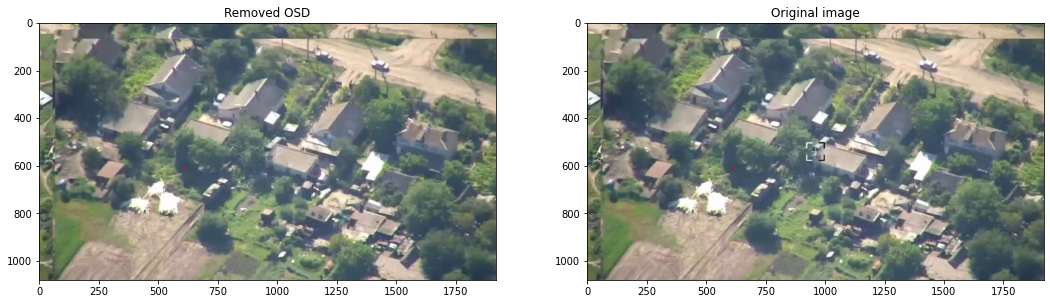

In [28]:
img = video[0]

plt.figure(figsize=(18, 12))
plt.subplot(1, 2, 1)
plt.imshow(removeOSD(img))
plt.title('Removed OSD')

plt.subplot(1, 2, 2)
plt.imshow(img) 
plt.title('Original image')